In [56]:
# IMPORTING NECESSARY LIBRARIES

In [134]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
import sklearn
import matplotlib.pyplot as plt
import string
import wordcloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle as pkl

In [58]:
# DOWNLOADING REQIREMENTS HERE
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
# OBJECT CREATION FOR CLASSES

In [60]:
ps = PorterStemmer()
cv = CountVectorizer()
tf = TfidfVectorizer()

In [61]:
df = pd.read_excel('finalDS.xlsx')

In [62]:
df.head(10)

,Label,Message,Covo
0,0.0,Where are you from? I am from your heart.,NaN
1,0.0,"If being sexy was a crime, you'd be guilty as ...",NaN
2,0.0,"I'd like to take you to the movies, but they d...",NaN
3,0.0,I think there's something wrong with my phone....,NaN
4,0.0,"I always thought happiness started with an 'h,...",NaN
5,0.0,Are you a time traveler? Because I absolutely ...,NaN
6,0.0,Do you know what my shirt is made of? Boyfrien...,NaN
7,0.0,"Hi, I'm (your name). Do you remember me? Oh, t...",NaN
8,1.0,What book are you reading right now?,NaN
9,1.0,What activities are you participating in at th...,NaN


In [63]:
df.shape

(456, 3)

In [64]:
# df.drop('Covo', axis=1, inplace=True)
df

,Label,Message,Covo
0,0.0,Where are you from? I am from your heart.,NaN
1,0.0,"If being sexy was a crime, you'd be guilty as ...",NaN
2,0.0,"I'd like to take you to the movies, but they d...",NaN
3,0.0,I think there's something wrong with my phone....,NaN
4,0.0,"I always thought happiness started with an 'h,...",NaN
...,...,...,...
451,0.0,Class mein tumne naye project ke ideas diye the,NaN
452,1.0,Tum meri zindagi ki sabse khoobsurat muskaan ho,NaN
453,0.0,School ki timings mein koi badlav hua?,NaN
454,0.0,Tu kitna interesting lag raha hai aaj,NaN


In [65]:
df.isnull().sum()

Label        3
Message      3
Covo       451
dtype: int64

In [66]:
# df.dropna(inplace=True)

In [67]:
df.shape

(456, 3)

In [68]:
df['Label'].value_counts()

Label
1.0    278
0.0    175
Name: count, dtype: int64

In [69]:
df['Message'].duplicated().sum()

np.int64(33)

In [70]:
# df.drop_duplicates('Message', inplace=True)

In [71]:
df.shape

(456, 3)

# EDA

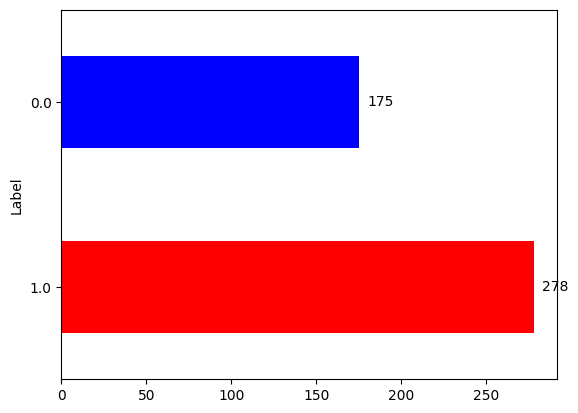

In [72]:
counts = df['Label'].value_counts()
counts.plot(kind='barh', color=['red', 'blue'])
for i, v in enumerate(counts):
    plt.text(v + 5, i, str(v), color='black', va='center')

In [73]:
print(df['Label'].nunique())

2


In [74]:
for val in df['Label'].unique():
    idx = df.index[df['Label'] == val].tolist()
    print(f"Value: {val}, Index positions: {idx}")

Value: 0.0, Index positions: [0, 1, 2, 3, 4, 5, 6, 7, 12, 18, 25, 27, 28, 32, 33, 34, 36, 37, 42, 44, 47, 49, 50, 61, 64, 65, 67, 69, 72, 73, 79, 80, 87, 92, 96, 98, 100, 102, 103, 105, 106, 112, 116, 120, 125, 129, 145, 147, 148, 149, 150, 154, 156, 172, 173, 189, 190, 191, 196, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 335, 336, 337, 339, 340, 343, 344, 345, 346, 347, 348, 350, 351, 354, 355, 357, 358, 360, 361, 363, 364, 366, 367, 369, 370, 372, 373, 375, 376, 378, 379, 381, 382, 384, 385, 387, 388, 390, 391, 393, 394, 396, 397, 399, 400, 402, 403, 405, 406, 408, 409, 411, 412, 414, 415, 417, 418, 420, 421, 423, 424, 426, 427, 429, 430, 432, 433, 435, 436, 438, 439, 441, 442, 444, 445, 447, 448, 450, 451, 453, 454]
Value: 1.0, Index positions: [8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 29, 30, 31, 35, 38, 39, 40, 41, 43, 45, 46, 48,

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Label    453 non-null    float64
 1   Message  453 non-null    object 
 2   Covo     5 non-null      object 
dtypes: float64(1), object(2)
memory usage: 10.8+ KB


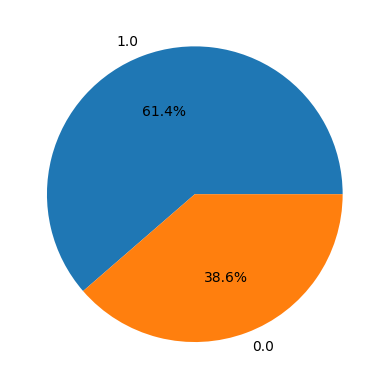

In [76]:
counts = df['Label'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

# TOKENIZATION

In [82]:
df['msg_char'] = df['Message'].fillna('').astype(str).apply(len)
df.head()

,Label,Message,Covo,msg_char
0,0.0,Where are you from? I am from your heart.,NaN,41
1,0.0,"If being sexy was a crime, you'd be guilty as ...",NaN,54
2,0.0,"I'd like to take you to the movies, but they d...",NaN,83
3,0.0,I think there's something wrong with my phone....,NaN,91
4,0.0,"I always thought happiness started with an 'h,...",NaN,86


In [85]:
df['msg_word'] = df['Message'].fillna('').astype(str).apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Label,Message,Covo,msg_char,msg_word
0,0.0,Where are you from? I am from your heart.,NaN,41,11
1,0.0,"If being sexy was a crime, you'd be guilty as ...",NaN,54,14
2,0.0,"I'd like to take you to the movies, but they d...",NaN,83,21
3,0.0,I think there's something wrong with my phone....,NaN,91,21
4,0.0,"I always thought happiness started with an 'h,...",NaN,86,22


In [87]:
df['sent_tok'] = df['Message'].fillna('').astype(str).apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(10)

,Label,Message,Covo,msg_char,msg_word,sent_tok
292,1.0,"Tum sirf sundar nahi, samajhdaar bhi ho. Dead...",NaN,55,12,2
372,0.0,Kitna difficult paper tha aaj,NaN,29,5,1
202,1.0,You give off main character vibes 😄,NaN,36,7,1
348,0.0,Okay,milte hain!,4,1,1
92,0.0,What’s your go-to food when you're happy or sad?,NaN,49,13,1
128,1.0,I admire how natural you seem.,NaN,30,7,1
148,0.0,Hi! Hope you're having a great day 😊,NaN,37,10,2
236,1.0,What are you currently passionate about?,NaN,41,7,1
170,1.0,Is it okay if I say you have a very graceful ...,NaN,55,13,1
155,1.0,Are you always this positive or is it a good day?,NaN,49,12,1


# CONVERSION OF EMOJI TO TEXTS
# THIS CONVERTS MY EMOJIS TO TEXT FOR CLEANER PROCESSING

In [92]:
import emoji


def convert_emojis(text):
    if not isinstance(text, str):
        text = ''  # or use 'No message'
    return emoji.demojize(text, language='en')


df['Message'] = df['Message'].apply(convert_emojis)

In [93]:
df['Message'] = df['Message'].apply(convert_emojis)

In [94]:
df['Message']

0              Where are you from? I am from your heart.
1      If being sexy was a crime, you'd be guilty as ...
2      I'd like to take you to the movies, but they d...
3      I think there's something wrong with my phone....
4      I always thought happiness started with an 'h,...
                             ...                        
451      Class mein tumne naye project ke ideas diye the
452      Tum meri zindagi ki sabse khoobsurat muskaan ho
453               School ki timings mein koi badlav hua?
454                Tu kitna interesting lag raha hai aaj
455            Main tumse har roz baat karna chahta hoon
Name: Message, Length: 456, dtype: object

In [95]:
df.head()

,Label,Message,Covo,msg_char,msg_word,sent_tok
0,0.0,Where are you from? I am from your heart.,NaN,41,11,2
1,0.0,"If being sexy was a crime, you'd be guilty as ...",NaN,54,14,1
2,0.0,"I'd like to take you to the movies, but they d...",NaN,83,21,1
3,0.0,I think there's something wrong with my phone....,NaN,91,21,2
4,0.0,"I always thought happiness started with an 'h,...",NaN,86,22,1


In [99]:
newdf = df.iloc[:, [0, 2, 3, 4]]
newdf

,Label,msg_char,msg_word,sent_tok
0,0.0,41,11,2
1,0.0,54,14,1
2,0.0,83,21,1
3,0.0,91,21,2
4,0.0,86,22,1
...,...,...,...,...
451,0.0,47,9,1
452,1.0,47,8,1
453,0.0,38,8,1
454,0.0,37,7,1


In [ ]:
# df.drop('Covo', inplace=True, axis=1)

In [100]:
newdf[newdf['Label'] == 0][['msg_word', 'msg_char', 'sent_tok']].describe()

,msg_word,msg_char,sent_tok
count,175.000000,175.000000,175.000000
mean,8.022857,35.485714,1.125714
std,4.237157,15.931555,0.349337
min,1.000000,2.000000,1.000000
25%,6.000000,27.000000,1.000000
50%,7.000000,34.000000,1.000000
75%,10.000000,45.000000,1.000000
max,26.000000,91.000000,3.000000


In [101]:
newdf[newdf['Label'] == 1][['msg_word', 'msg_char', 'sent_tok']].describe()

,msg_word,msg_char,sent_tok
count,278.000000,278.000000,278.000000
mean,11.053957,49.514388,1.201439
std,3.063816,12.102964,0.436260
min,0.000000,0.000000,0.000000
25%,9.000000,42.000000,1.000000
50%,11.000000,48.000000,1.000000
75%,13.000000,56.000000,1.000000
max,21.000000,86.000000,3.000000


# PLOTTING THE HEATMAP FOR BETTER UNDERSTANDING THE RELATIOSHIP AND CORRELATIONS WITH VARIABLES

<Axes: >

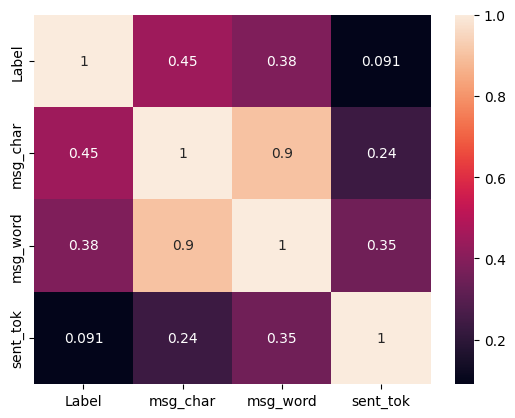

In [102]:
sns.heatmap(newdf.corr(), annot=True)

In [103]:
from nltk import word_tokenize
from nltk.corpus import stopwords


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# APPLYING THE ABOVE CUSTOM FUNCTION TO THE MESSAGE COLUMN

In [104]:
df['clean_msg'] = df['Message'].apply(transform_text)

In [105]:
df

,Label,Message,msg_char,msg_word,sent_tok,clean_msg
0,0.0,Where are you from? I am from your heart.,41,11,2,heart
1,0.0,"If being sexy was a crime, you'd be guilty as ...",54,14,1,sexi crime guilti charg
2,0.0,"I'd like to take you to the movies, but they d...",83,21,1,like take movi let bring snack
3,0.0,I think there's something wrong with my phone....,91,21,2,think someth wrong phone could tri call see work
4,0.0,"I always thought happiness started with an 'h,...",86,22,1,alway thought happi start h turn mine start u
...,...,...,...,...,...,...
451,0.0,Class mein tumne naye project ke ideas diye the,47,9,1,class mein tumn nay project ke idea diy
452,1.0,Tum meri zindagi ki sabse khoobsurat muskaan ho,47,8,1,tum meri zindagi ki sabs khoobsurat muskaan ho
453,0.0,School ki timings mein koi badlav hua?,38,8,1,school ki time mein koi badlav hua
454,0.0,Tu kitna interesting lag raha hai aaj,37,7,1,tu kitna interest lag raha hai aaj


# USE OF WORDCLOUD

In [106]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

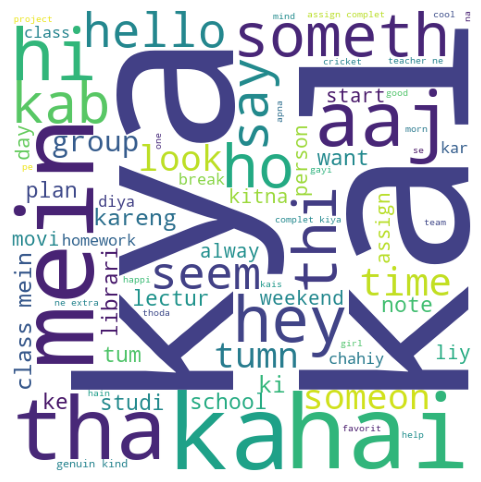

In [107]:
FriendZone_wc = wc.generate(df[df['Label'] == 0]['clean_msg'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(FriendZone_wc)
plt.axis("off")
plt.show()

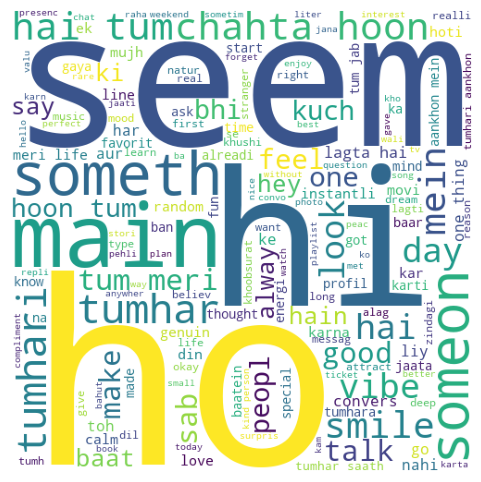

In [108]:
RizzAccpted_wc = wc.generate(df[df['Label'] == 1]['clean_msg'].str.cat(sep=" "))

plt.figure(figsize=(15, 6))
plt.imshow(FriendZone_wc)
plt.axis("off")
plt.show()

In [ ]:
# VECTORIZATION WITH TD IDF
# (choose more unique and rare set of words)

In [ ]:
# df = df.dropna(subset=['Label'])

In [114]:
J = tf.fit_transform(df['clean_msg']).toarray()

In [115]:
J

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.32619408, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(453, 747))

In [ ]:
# VECTORIZATION WITH COUNT VECTORIZATION METHONDS
# (normal way getting the mode)

In [256]:
K = cv.fit_transform(df['clean_msg']).toarray()
K

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(453, 747))

# TRAIN TEST SPLIT 

In [257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    K,
    df['Label'],  
    test_size=0.2,  # 20% data for testing
    random_state=69,  # for reproducibility
    stratify=df['Label']  # keeps class balance same in train/test
)

print("X Train is : ", X_train.shape)
print("X Test is : ", X_test.shape)
print("y Train is : ", y_train.shape)
print("y Test is : ", y_test.shape)

X Train is :  (362, 747)
X Test is :  (91, 747)
y Train is :  (362,)
y Test is :  (91,)


In [258]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [259]:
print(type(y_train))
print(y_train.shape)
print(y_train[:10])  # First 10 rows

<class 'pandas.core.series.Series'>
(362,)
128    1.0
124    1.0
54     1.0
363    0.0
244    1.0
206    1.0
396    0.0
397    0.0
277    1.0
180    1.0
Name: Label, dtype: float64


In [260]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [261]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7912087912087912

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.60      0.69        35
           1       0.78      0.91      0.84        56

    accuracy                           0.79        91
   macro avg       0.80      0.76      0.77        91
weighted avg       0.79      0.79      0.78        91



In [262]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [263]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.7472527472527473
[[25 10]
 [13 43]]
0.8113207547169812


In [264]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.7912087912087912
[[21 14]
 [ 5 51]]
0.7846153846153846


In [265]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.7582417582417582
[[17 18]
 [ 4 52]]
0.7428571428571429


In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [267]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [268]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt
}

In [269]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [270]:
train_classifier(svc, X_train, y_train,X_test,y_test)

(0.7142857142857143, 0.7586206896551724)

In [271]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7142857142857143
Precision -  0.7586206896551724
For  KN
Accuracy -  0.5274725274725275
Precision -  0.7407407407407407
For  NB
Accuracy -  0.7912087912087912
Precision -  0.7846153846153846
For  DT
Accuracy -  0.7252747252747253
Precision -  0.691358024691358
For  LR
Accuracy -  0.8131868131868132
Precision -  0.8305084745762712
For  RF
Accuracy -  0.8131868131868132
Precision -  0.819672131147541
For  AdaBoost
Accuracy -  0.7362637362637363
Precision -  0.7
For  BgC
Accuracy -  0.8461538461538461
Precision -  0.85
For  ETC
Accuracy -  0.8241758241758241
Precision -  0.8225806451612904
For  GBDT
Accuracy -  0.7582417582417582
Precision -  0.717948717948718


In [272]:
# random state 42

In [273]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision', ascending=False)

performance_df

,Algorithm,Accuracy,Precision
7,BgC,0.846154,0.850000
4,LR,0.813187,0.830508
8,ETC,0.824176,0.822581
5,RF,0.813187,0.819672
2,NB,0.791209,0.784615
0,SVC,0.714286,0.758621
1,KN,0.527473,0.740741
9,GBDT,0.758242,0.717949
6,AdaBoost,0.736264,0.700000
3,DT,0.725275,0.691358


In [274]:

pkl.dump(bc, open('NewBgCmodel.pkl', 'wb'))

In [275]:
pkl.dump(tf, open('Vectorizer.pkl', 'wb'))